In [1]:
# Gradient
from sympy.vector import *
from sympy import symbols
N = CoordSys3D('N')
x, y, z = symbols('x y z')
A = N.x**2 *N.y + 2 *N.x *N.z - 4
delop = Del()
gradA = delop(A)
print(f'\nThe gradient of {A} is\n')
display(gradA)
display(gradient(A))


The gradient of N.x**2*N.y + 2*N.x*N.z - 4 is



(Derivative(N.x**2*N.y + 2*N.x*N.z - 4, N.x))*N.i + (Derivative(N.x**2*N.y + 2*N.x*N.z - 4, N.y))*N.j + (Derivative(N.x**2*N.y + 2*N.x*N.z - 4, N.z))*N.k

(2*N.x*N.y + 2*N.z)*N.i + N.x**2*N.j + 2*N.x*N.k

In [2]:
# Divergence
from sympy.vector import *
from sympy import symbols
N = CoordSys3D('N')
x, y, z = symbols('x y z')
A = N.x**2 *N.y *N.z *N.i + N.x *N.y**2*N.z*N.j + N.x*N.y*N.z**2*N.k
delop = Del()
divA = delop.dot(A)
display(divA)
print(f'\nDivergence of {A} is\n')
display(divergence(A))

Derivative(N.x*N.y*N.z**2, N.z) + Derivative(N.x*N.y**2*N.z, N.y) + Derivative(N.x**2*N.y*N.z, N.x)


Divergence of N.x**2*N.y*N.z*N.i + N.x*N.y**2*N.z*N.j + N.x*N.y*N.z**2*N.k is



6*N.x*N.y*N.z

In [3]:
# Curl
from sympy.vector import *
from sympy import symbols
N = CoordSys3D('N')
x, y, z = symbols('x y z')
A = N.x**2 *N.y *N.z *N.i + N.x *N.y**2 *N.z *N.j + N.x *N.y *N.z**2 *N.k
delop = Del()
curlA = delop.cross(A)
display(curlA)
print(f'\nCurl of {A} is\n')
display(curl(A))

(Derivative(N.x*N.y*N.z**2, N.y) - Derivative(N.x*N.y**2*N.z, N.z))*N.i + (-Derivative(N.x*N.y*N.z**2, N.x) + Derivative(N.x**2*N.y*N.z, N.z))*N.j + (Derivative(N.x*N.y**2*N.z, N.x) - Derivative(N.x**2*N.y*N.z, N.y))*N.k


Curl of N.x**2*N.y*N.z*N.i + N.x*N.y**2*N.z*N.j + N.x*N.y*N.z**2*N.k is



(-N.x*N.y**2 + N.x*N.z**2)*N.i + (N.x**2*N.y - N.y*N.z**2)*N.j + (-N.x**2*N.z + N.y**2*N.z)*N.k

In [4]:
# Lab 02 Solution of algebraic and transcendental equation by Regula-Falsi method
# Obtain a root of the equation x**3 - 2*x - 5 = 0 between 2 and 3 by regula falsi method. Perform 5 iterations
from sympy import *
x = Symbol('x')
g = input('Enter the function: ')
f = lambdify(x, g)
a = float(input('Enter a value: '))
b = float(input('Enter b value: '))
n = int(input('Enter number of iterations: '))
for i in range(1, n+1):
    c = (a*f(b) - b*f(a)) / (f(b) - f(a))
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    print('iteration %d \t the root is %0.3f \t function value %0.3f\n' %(i, c, f(c)))

iteration 1 	 the root is 2.059 	 function value -0.391

iteration 2 	 the root is 2.081 	 function value -0.147

iteration 3 	 the root is 2.090 	 function value -0.055

iteration 4 	 the root is 2.093 	 function value -0.020

iteration 5 	 the root is 2.094 	 function value -0.007



In [5]:
# Lab-03 Solution of algebraic and transcendental equation by Newton Raphson method.
# Find a root of the equation 3*x = cos(x) + 1 near 1 by Newton Raphson method. Perform 5 iterations.
from sympy import *
x = Symbol('x')
g = input('Enter the funciton: ')
f = lambdify(x, g)
dg = diff(g)
df = lambdify(x, dg)
x0 = float(input('Enter the initial approximation: '))
n = int(input('Enter the number of iterations: '))
for i in range(1, n+1):
    x1 = x0 - f(x0) / df(x0)
    print('iteration %d \t the root is %0.3f \t function value %0.3f\n' %(i, x1, f(x1)))
    x0 = x1

iteration 1 	 the root is 0.620 	 function value 0.046

iteration 2 	 the root is 0.607 	 function value 0.000

iteration 3 	 the root is 0.607 	 function value 0.000

iteration 4 	 the root is 0.607 	 function value 0.000

iteration 5 	 the root is 0.607 	 function value -0.000



In [7]:
#Lab 04 Interpolation using Newtons forward difference formula.
# Use Newtons forward interpolation to obtain the interpolating polynomial and hence calculate y(2) for following:
# x: 1  3   5   7   9
# y: 6  10  62  210  502
from sympy import *
import numpy as np
n = int(input('Enter the number of data points: '))
x = np.zeros((n))
y = np.zeros((n, n))
print('Enter data for x and y: ')
for i in range(n):
    x[i] = float(input('x[' + str(i) + ']='))
    y[i][0] = float(input('y[' + str(i) + ']='))
for i in range(1, n):
    for j in range(0, n-i):
        y[j][i] = y[j+1][i-1] - y[j][i-1]
print('\nForward Difference Table\n')
for i in range(0, n):
    print('%0.2f' %(x[i]), end='')
    for j in range(0, n-i):
        print('\t\t%0.2f' %(y[i][j]), end='')
    print()
# Obtaining the polynomial
t = symbols('t')
f = []
p = (t - x[0]) / (x[1] - x[0])
f.append(p)
for i in range(1, n-1):
    f.append(f[i-1] * (p-i) / (i+1))
    poly = y[0][0]
for i in range(n-1):
    poly = poly + y[0][i+1] * f[i]
simp_poly = simplify(poly)
print('\nThe Interpolating polynomial is\n')
pprint(simp_poly)
inter = input('Do you want to interpolate at a point (y/n)? ')
if inter == 'y':
    a = float(input('Enter the point '))
    interpol = lambdify(t, simp_poly)
    result = interpol(a)
    print('\nThe value of the function at', a, 'is\n', result)

Enter data for x and y: 

Forward Difference Table

1.00		6.00		4.00		48.00		48.00		0.00
3.00		10.00		52.00		96.00		48.00
5.00		62.00		148.00		144.00
7.00		210.00		292.00
9.00		502.00

The Interpolating polynomial is

     3        2              
1.0⋅t  - 3.0⋅t  + 1.0⋅t + 7.0

The value of the function at 2.0 is
 5.0


In [8]:
#Lab 05 Interpolation using Newtons backward difference formula.
# Use Newtons forward interpolation to obtain the interpolating polynomial and hence calculate y(8) for following:
# x: 1  3   5   7   9
# y: 6  10  62  210  502
from sympy import *
import numpy as np
n = int(input('Enter the number of data points: '))
x = np.zeros((n))
y = np.zeros((n, n))
print('Enter data for x and y: ')
for i in range(n):
    x[i] = float(input('x[' + str(i) + ']='))
    y[i][0] = float(input('y[' + str(i) + ']='))
for i in range(1, n):
    for j in range(n-1, i-2, -1):
        y[j][i] = y[j][i-1] - y[j-1][i-1]
print('\nBackward Difference Table\n')
for i in range(0, n):
    print('%0.2f' %(x[i]), end='')
    for j in range(0, i+1):
        print('\t\t%0.2f' %(y[i][j]), end='')
    print()
# Obtaining the polynomial
t = symbols('t')
f = []
p = (t - x[n-1]) / (x[1] - x[0])
f.append(p)
for i in range(1, n-1):
    f.append(f[i-1] * (p+i) / (i+1))
poly = y[n-1][0]
print(poly)
for i in range(n-1):
    poly = poly + y[n-1][i+1] * f[i]
simp_poly = simplify(poly)
print('\nThe Interpolating polynomial is\n')
pprint(simp_poly)
inter = input('Do you want to interpolate at a point (y/n)? ')
if inter == 'y':
    a = float(input('Enter the point '))
    interpol = lambdify(t, simp_poly)
    result = interpol(a)
    print('\nThe value of the function at', a, 'is\n', result)

Enter data for x and y: 

Backward Difference Table

1.00		6.00
3.00		10.00		4.00
5.00		62.00		52.00		48.00
7.00		210.00		148.00		96.00		48.00
9.00		502.00		292.00		144.00		48.00		0.00
502.0

The Interpolating polynomial is

     3        2              
1.0⋅t  - 3.0⋅t  + 1.0⋅t + 7.0

The value of the function at 8.0 is
 335.0


In [9]:
# Lab - 06 : Computation of area under the curve using Trapezoidal, Simpson 1/3, Simpson 3/8
# Trapezoidal : Evaluate integral 0 to 5 of 1 /(1 + x**2)

def my_func(x):
    return 1 / (1 + x**2)

def trapezoidal(x0, xn, n):
    h = (xn - x0) / n
    integration = my_func(x0) + my_func(xn)
    for i in range(1, n):
        k = x0 + i * h
        integration = integration + 2*my_func(k)
    integration = integration * h / 2
    return integration

lower_limit = float(input('Enter the lower limit of integration: '))
upper_limit = float(input('Enter the upper limit of integration: '))
sub_interval = int(input('Enter the number of sub intervals: '))
result = trapezoidal(lower_limit, upper_limit, sub_interval)
print('Integration result by Trapezoidal method is: ', result)

Integration result by Trapezoidal method is:  1.3731040812301099


In [10]:
# Simpson 1/3 : Evaluate integral 0 to 5 of 1 / (1 + x**2)

def my_func(x):
    return 1 / (1 + x**2)

def simpson13(x0, xn, n):
    h = (xn - x0) / n
    integration = my_func(x0) + my_func(xn)
    for i in range(1, n):
        if i % 2 == 0:
            integration = integration + 2 * my_func(x0 + i * h)
        else:
            integration = integration + 4 * my_func(x0 + i * h)
    integration = integration * h * (1/3)
    return integration
lower_limit = float(input('Enter the lower limit of integration: '))
upper_limit = float(input('Enter the upper limit of integration: '))
sub_interval = int(input('Enter the number of sub intervals: '))
result = simpson13(lower_limit, upper_limit, sub_interval)
print("Integration result by Simpson's 1/3 method is: ", result)

Integration result by Simpson's 1/3 method is:  1.3509007036862424


In [11]:
# Simpson 3/8 : Evaluate integral 0 to 6 of 1 / (1 + x**2) taking 6 sub interval

def f(x):
    return 1 / (1 + x**2)

def simpson38(x0, xn, n):
    h = (xn - x0) / n
    integration = f(x0) + f(xn)
    for i in range(1, n):
        if i % 3 == 0:
            integration = integration + 2 * f(x0 + i * h)
        else:
            integration = integration + 3 * f(x0 + i * h)
    integration = integration * h * 3 / 8
    return integration

lower_limit = float(input('Enter the lower limit of integration: '))
upper_limit = float(input('Enter the upper limit of integration: '))
sub_interval = int(input('Enter the number of sub intervals: '))
result = simpson38(lower_limit, upper_limit, sub_interval)
print("Integration result by Simpson's 3/8 method is: ", result)

Integration result by Simpson's 3/8 method is:  1.3570808364926013


In [ ]:
# Lab 07 : Taylor Series
# Solve dy/dx - 2y = 3e^x with y(0)=0 using taylor series method at x = 0.1 (0.1) 0.3

from numpy import *
def taylor(deriv, x, y, xStop, h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        D = deriv(x, y)
        H = 1.0
        for j in range(3):
            H = H * h / (j + 1)
            y = y + D[j] * H
        x = x + h
        X.append(x)
        Y.append(y)
    return array(X), array(Y)

def deriv(x, y):
    D = zeros((4, 1))
    D[0] = [2 * y[0] + 3 * exp(x)]
    D[1] = [4 * y[0] + 9 * exp(x)]
    D[2] = [8 * y[0] + 21 * exp(x)]
    D[3] = [16 * y[0] + 45 * exp(x)]
    return D

x = 0.0
xStop = 0.3
y = array([0.0])
h = 0.1
X, Y = taylor(deriv, x, y, xStop, h)
print("The required values are at: x = %0.2f, y = %0.5f, x = %0.2f, y = %0.5f, x = %0.2f, y = %0.5f, x = %0.2f, y = %0.5f" %(X[0], Y[0], X[1], Y[1], X[2], Y[2], X[3], Y[3]))

The required value at x = 100.00, y = 37.25290





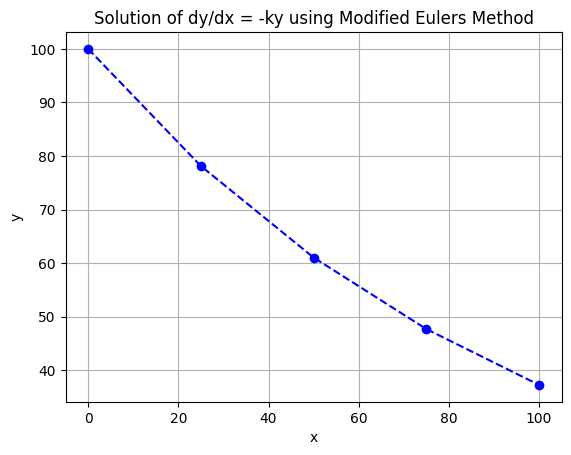

In [12]:
# Lab 08: Modified Eulers method
# solve y' = -ky with y(0) = 100 using modified Eulers method at x = 100 by taking h = 25

import numpy as np
import matplotlib.pyplot as plt

def modified_euler(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        x[i + 1] = x[i] + h
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i + 1], y[i] + k1)
        y[i + 1] = y[i] + 0.5 * (k1 + k2)
    return x, y

def f(x, y):
    return -0.01 * y

x0 = 0.0
y0 = 100.0
h = 25
n = 4
x, y = modified_euler(f, x0, y0, h, n)
print("The required value at x = %0.2f, y = %0.5f" %(x[4], y[4]))
print("\n\n")
plt.plot(x, y, 'bo--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of dy/dx = -ky using Modified Eulers Method')
plt.grid(True)
plt.show()

In [13]:
# Lab 09: Runge Kutta Method
# Apply Runge Kutta method to find the solution of dy/dx = 1 + (y/x) at y(2) taking h = 0.2. Given that y(1) = 2

from sympy import *
import numpy as np
def RungeKutta(g, x0, h, y0, xn):
    x, y = symbols('x, y')
    f = lambdify([x, y], g)
    xt = x0 + h
    Y = [y0]
    while xt <= xn:
        k1 = h * f(x0, y0)
        k2 = h * f(x0 + h/2, y0 + k1/2)
        k3 = h * f(x0 + h/2, y0 + k2/2)
        k4 = h * f(x0 + h, y0 + k3)
        y1 = y0 + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        Y.append(y1)
        x0 = xt
        y0 = y1
        xt = xt + h
    return np.round(Y, 2)

RungeKutta('1+(y/x)', 1, 0.2, 2, 2)

array([2.  , 2.62, 3.27, 3.95, 4.66, 5.39])

In [14]:
# Lab 10: Milne's Predictor and Corrector Method
# Solve dy/dx = x^2 + (y/2) at y(1.4).
# Given that y(1)=2, y(1.1)=2.2156, y(1.2)=2.4649, y(1.3)=2.7514. Use Corrector formula twice

x0 = 1
y0 = 2
y1 = 2.2156
y2 = 2.4649
y3 = 2.7514
h = 0.1
x1 = x0 + h
x2 = x1 + h
x3 = x2 + h
x4 = x3 + h

def f(x, y):
    return x**2 + (y/2)

y10 = f(x0, y0)
y11 = f(x1, y1)
y12 = f(x2, y2)
y13 = f(x3, y3)
y4p = y0 + (4*h/3) * (2*y11 - y12 + 2*y13)
print('predicted value of y4 is %3.3f' %y4p)
y14 = f(x4, y4p)

for i in range (1, 4):
    y4 = y2 + (h/3) * (y14 + 4*y13 + y12)
    print('corrected value of y4 after \t iteration %d is \t %3.5f \t' %(i, y4))
    y14 = f(x4, y4)

predicted value of y4 is 3.079
corrected value of y4 after 	 iteration 1 is 	 3.07940 	
corrected value of y4 after 	 iteration 2 is 	 3.07940 	
corrected value of y4 after 	 iteration 3 is 	 3.07940 	
